In [2]:
%load_ext autoreload
%autoreload 2
from analysis_lib import *

## Variable k Size and Query Component Runtime Analysis

In [3]:
df_single = pd.read_csv("./variable_k/runtimes/runtimes_single_bin.tsv", sep="\t", header=None)
df_k3 = pd.read_csv("./variable_k/runtimes/runtimes_k3.tsv", sep="\t", header=None)
df_k4 = pd.read_csv("./variable_k/runtimes/runtimes_k4.tsv", sep="\t", header=None)
df_k5 = pd.read_csv("./variable_k/runtimes/runtimes_k5.tsv", sep="\t", header=None)
df_k6 = pd.read_csv("./variable_k/runtimes/runtimes_k6.tsv", sep="\t", header=None)

In [4]:
dfs = [df_k3, df_k4, df_k5,df_k6]

In [5]:
for df in dfs:
    df.columns = ["Preprocessing","Construction","Traversal","Scanning"]

In [6]:
df_single.columns = ["tmp"]
df_single["Preprocessing"] = 0
df_single["Construction"] = 0
df_single["Traversal"] = 0
df_single["Scanning"] = df_single["tmp"]
df_single = df_single.drop(columns=["tmp"], axis=1)

In [17]:
runtime_means = [df_single.mean(),df_k3.mean(),df_k4.mean(),df_k5.mean(),df_k6.mean()]

In [18]:
runtime_df = pd.DataFrame(runtime_means)

In [19]:
runtime_df["ksize"] = pd.Series(["No Index", 3,4,5,6])

In [9]:
runtime_df

,Preprocessing,Construction,Traversal,Scanning,ksize
0,0.000000,0.000000,0.000000,0.453382,No Index
1,0.000008,0.000031,0.003215,0.428365,3
2,0.000008,0.000038,0.013287,0.236792,4
3,0.000008,0.000037,0.276046,0.067538,5
4,0.000008,0.000030,0.041464,0.035242,6


Text(0, 0.5, 'Runtime (s)')

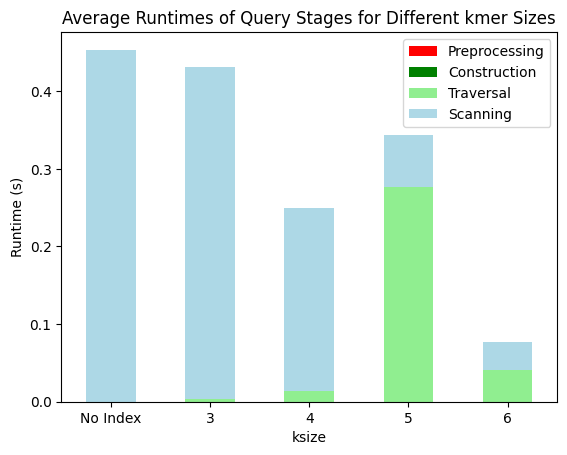

In [10]:
colors = ['red','green', 'lightgreen', 'lightblue']
plt = runtime_df.plot(kind='bar', stacked=True, x="ksize", y=["Preprocessing","Construction","Traversal","Scanning"], rot=0, color=colors, title="Average Runtimes of Query Stages for Different kmer Sizes")
plt.set_ylabel("Runtime (s)")

## Analysis of Runtimes and Query kmer Complexity

In [7]:
df_single = pd.read_csv("./variable_k/runtimes/runtimes_single_bin.tsv", sep="\t", header=None)
df_k3 = pd.read_csv("./variable_k/runtimes_and_complex/runtimes_and_complex_k3.txt", sep="\t", header=None)
df_k4 = pd.read_csv("./variable_k/runtimes_and_complex/runtimes_and_complex_k4.txt", sep="\t", header=None)
df_k5 = pd.read_csv("./variable_k/runtimes_and_complex/runtimes_and_complex_k5.txt", sep="\t", header=None)
df_k6 = pd.read_csv("./variable_k/runtimes_and_complex/runtimes_and_complex_k6.txt", sep="\t", header=None)

In [8]:
df_single.columns = ["tmp"]
df_single["Preprocessing"] = 0
df_single["Construction"] = 0
df_single["Traversal"] = 0
df_single["Scanning"] = df_single["tmp"]
df_single["Complexity"] = 0
df_single["Index Queries"] = 0
df_single["Cache Hits"] = 0
df_single = df_single.drop(columns=["tmp"], axis=1)

In [9]:
dfs = [df_k3, df_k4, df_k5,df_k6]
for df in dfs:
    df.columns = ["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries","Cache Hits"]

## Percentage of Total Complexity that gets Queried

In [10]:
df_k3["ksize"] = 3
df_k4["ksize"] = 4
df_k5["ksize"] = 5
df_k6["ksize"] = 6

In [11]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries","Cache Hits","ksize"], how='outer'), dfs)

In [12]:
df_merged["Kmer Fraction Queried"] = df_merged["Index Queries"]/df_merged["Complexity"]

Text(0.5, 1.0, 'Fraction of Kmer Complexity Queried')

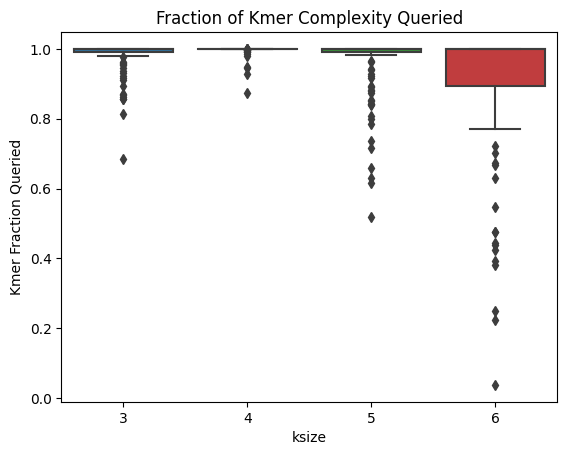

In [13]:
sns.boxplot(data=df_merged, x="ksize", y="Kmer Fraction Queried").set_title("Fraction of Kmer Complexity Queried")

In [14]:
df_large_complexity = df_merged[df_merged["Complexity"]>100]

Text(0.5, 1.0, 'Fraction of Kmer Complexity Queried (Complexity > 100)')

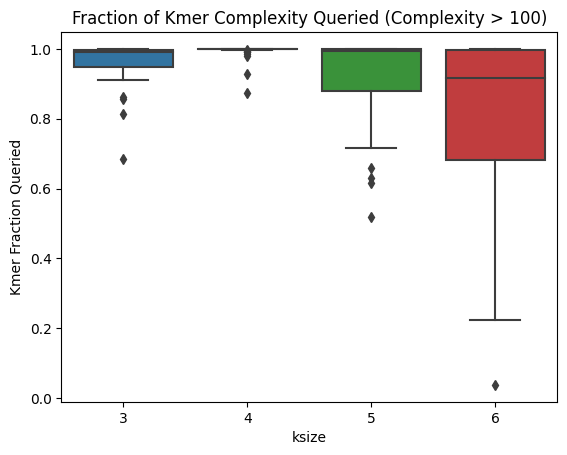

In [15]:
sns.boxplot(data=df_large_complexity, x="ksize", y="Kmer Fraction Queried").set_title("Fraction of Kmer Complexity Queried (Complexity > 100)")

## Does the kmer cache even help that much?

<Axes: xlabel='ksize', ylabel='Cache Hits'>

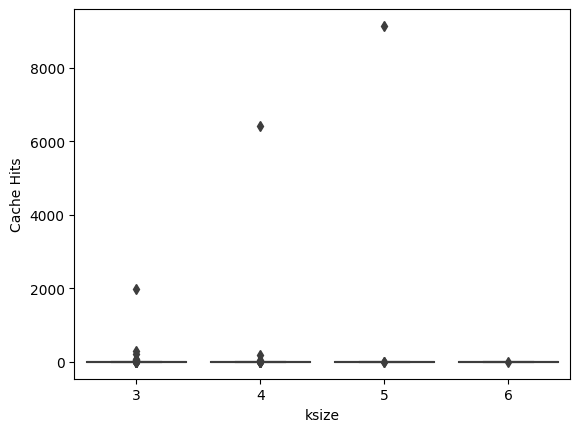

In [ ]:
sns.boxplot(data=df_merged, x="ksize", y="Cache Hits")